# PROBLEM STATEMENT

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)(1 = Yes, 0 = No)
- creatinine phosphokinase  (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)(1 = Yes, 0 = No)
- ejection fraction: percentage of blood leaving the heart at each contraction  (percentage)
- high blood pressure: if the patient has hypertension (boolean)(1 = Yes, 0 = No)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)(1 = Male, 0 = Female)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)(1 = Yes, 0 = No)
- time: follow-up period (days)
- [target] death event: if the patient died during the follow-up period (boolean)---> (1 = Death, 0 = Alive)


- Usually, in a heart failure dataset, Class 1 (Death) is more important because false negatives (predicting Alive when the patient might die) can be dangerous.

# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# READ TABLE

In [2]:
data = pd.read_table(r"C:\Users\Pragya\Downloads\heart+failure+clinical+records\heart_failure_clinical_records_dataset.csv",delimiter=",")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# PREPROCESSING

**SHAPE**

In [51]:
print("Shape of data Set is :", data.shape)

Shape of data Set is : (299, 13)


**COLUMNS**

In [55]:
print("There are total 13 columns :\n\n", data.columns)

There are total 13 columns :

 Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


**DESCRIPTIVE STATISTICS**

In [41]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


**SUMMARIZED INFORMATION**

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


**DUPLICATES**

In [43]:
data.duplicated().sum()

0

**NULL VALUES**

In [23]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

No missing values are detected.

**ANAMOLY DETECTION**

In [19]:
for i in data.columns:
    print({i:data[i].unique()})

{'age': array([75.   , 55.   , 65.   , 50.   , 90.   , 60.   , 80.   , 62.   ,
       45.   , 49.   , 82.   , 87.   , 70.   , 48.   , 68.   , 53.   ,
       95.   , 58.   , 94.   , 85.   , 69.   , 72.   , 51.   , 57.   ,
       42.   , 41.   , 67.   , 79.   , 59.   , 44.   , 63.   , 86.   ,
       66.   , 43.   , 46.   , 61.   , 81.   , 52.   , 64.   , 40.   ,
       60.667, 73.   , 77.   , 78.   , 54.   , 47.   , 56.   ])}
{'anaemia': array([0, 1], dtype=int64)}
{'creatinine_phosphokinase': array([ 582, 7861,  146,  111,  160,   47,  246,  315,  157,  123,   81,
        231,  981,  168,   80,  379,  149,  125,   52,  128,  220,   63,
        148,  112,  122,   60,   70,   23,  249,  159,   94,  855, 2656,
        235,  124,  571,  127,  588, 1380,  553,  129,  577,   91, 3964,
         69,  260,  371,   75,  607,  789,  364, 7702,  318,  109,   68,
        250,  110,  161,  113, 5882,  224,   92,  102,  203,  336,   76,
         55,  280,   78,   84,  115,   66,  897,  154,  144,  133

No anamoly detected.  
All data type is present in proper format

**TARGET VARIABLE DISTRIBUTION**

In [44]:
data['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

Distribution of Target variable is:  
class 0 --> 203  
class 1 --> 96

By Observing the class distribution we can say that dataset is imbalance  
we have to make it balance so that we can built a good model.

# DATA VISUALIZATION

1. Age vs DEATH_EVENT (Survival Analysis)  
Plot Type: Boxplot / Violin Plot

Insight: Dekhne ke liye ki kya umr zyada hone se death risk badhta hai.

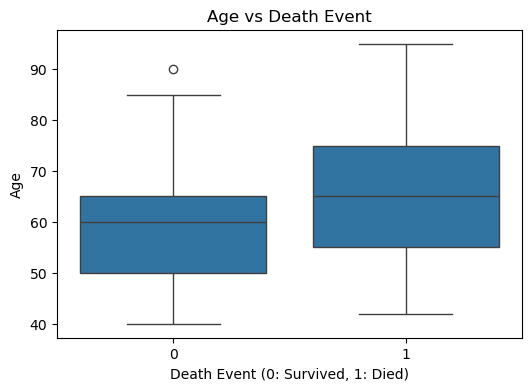

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(x=data["DEATH_EVENT"], y=data["age"])
plt.xlabel("Death Event (0: Survived, 1: Died)")
plt.ylabel("Age")
plt.title("Age vs Death Event")
plt.show()

2. Ejection Fraction vs DEATH_EVENT  
Plot Type: Boxplot / Violin Plot

Insight: Ejection Fraction (Heart Pumping Capacity) ka impact death rate pe.


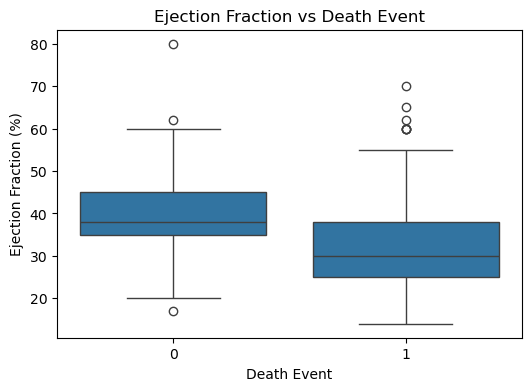

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data["DEATH_EVENT"], y=data["ejection_fraction"])
plt.xlabel("Death Event")
plt.ylabel("Ejection Fraction (%)")
plt.title("Ejection Fraction vs Death Event")
plt.show()

3. Serum Creatinine vs DEATH_EVENT
Plot Type: Boxplot

Insight: Kidney function ka impact heart failure pe.


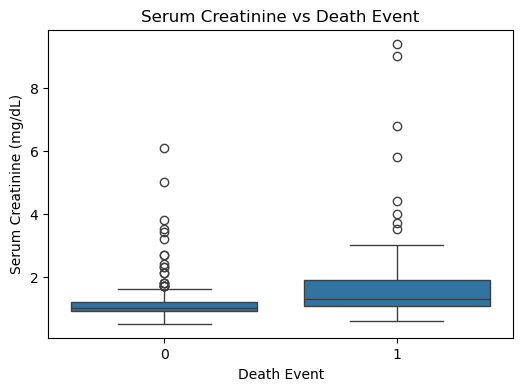

In [30]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data["DEATH_EVENT"], y=data["serum_creatinine"])
plt.xlabel("Death Event")
plt.ylabel("Serum Creatinine (mg/dL)")
plt.title("Serum Creatinine vs Death Event")
plt.show()

4. Smoking vs DEATH_EVENT  
Plot Type: Countplot

Insight: Smoking ka effect death event pe.


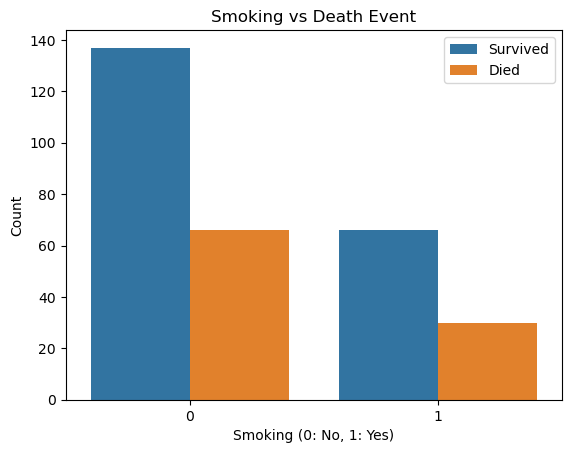

In [31]:
sns.countplot(x=data["smoking"], hue=data["DEATH_EVENT"])
plt.xlabel("Smoking (0: No, 1: Yes)")
plt.ylabel("Count")
plt.title("Smoking vs Death Event")
plt.legend(["Survived", "Died"])
plt.show()

5. Correlation Matrix (Heatmap)  
Plot Type: Heatmap

Insight: Variables ke beech correlation dekhne ke liye.


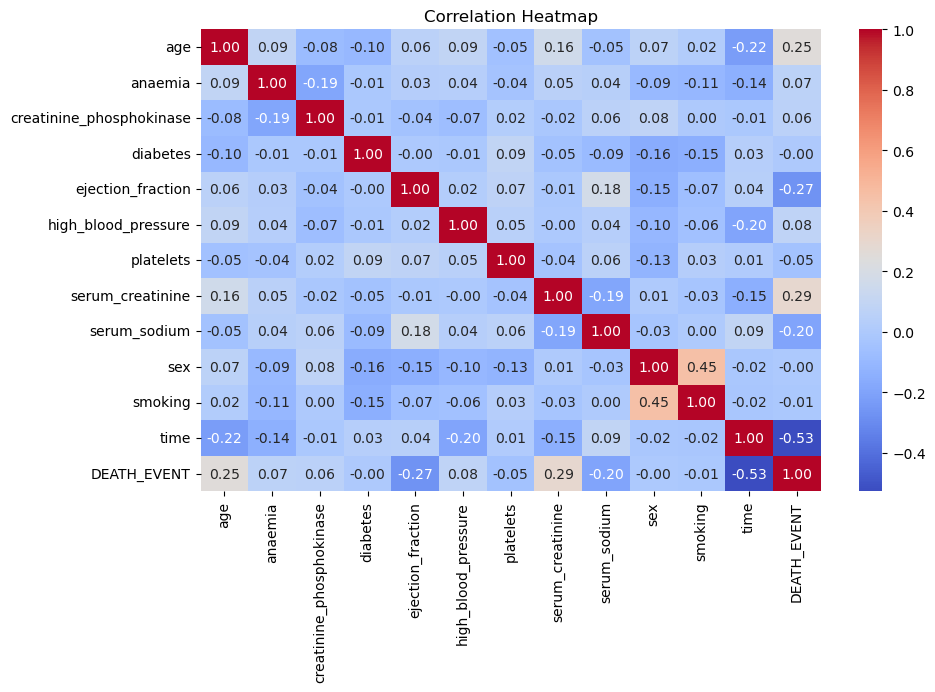

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

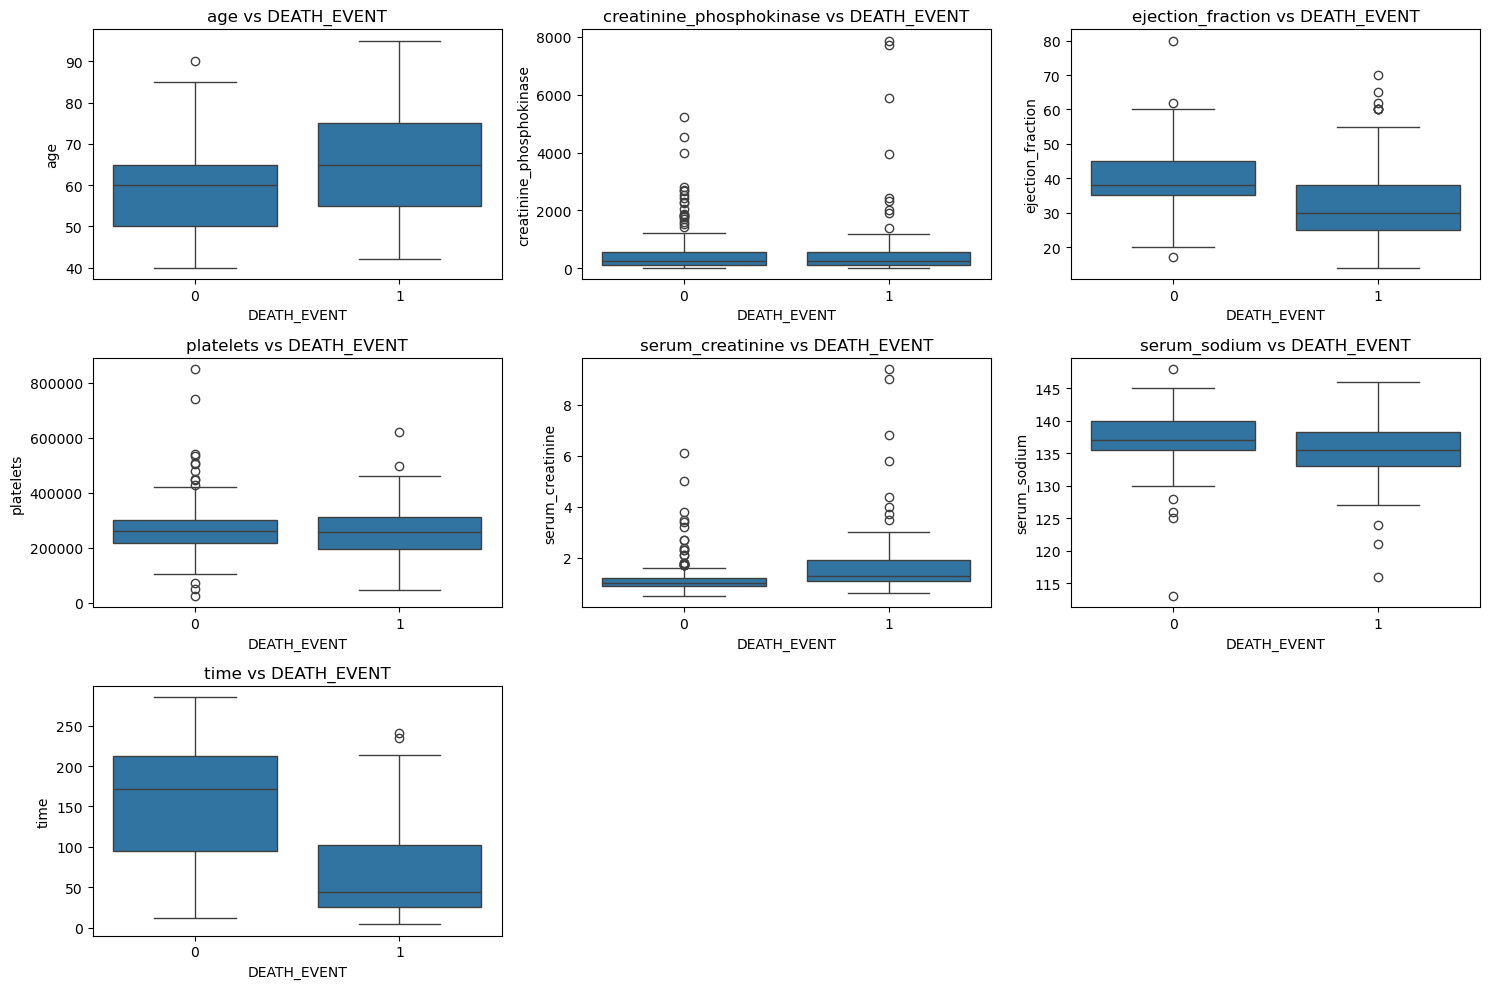

In [39]:
numerical_columns = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data["DEATH_EVENT"], y=data[col])
    plt.title(f"{col} vs DEATH_EVENT")

plt.tight_layout()
plt.show()

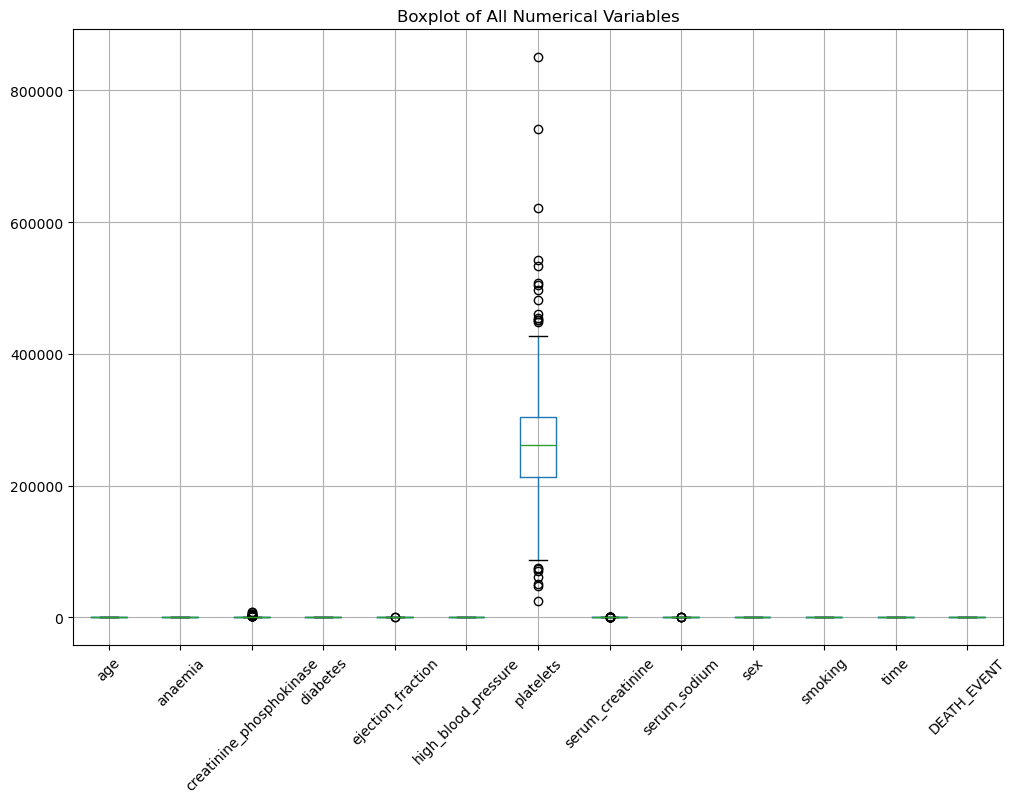

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating boxplots for all numerical columns
plt.figure(figsize=(12, 8))
data.boxplot(rot=45)  # Rotating labels for better visibility
plt.title("Boxplot of All Numerical Variables")
plt.show()

Outliers detected in this variable should not be treated as outliers  
because this data set is a dataset of patients which might be high and low 

**HISTPLOT**

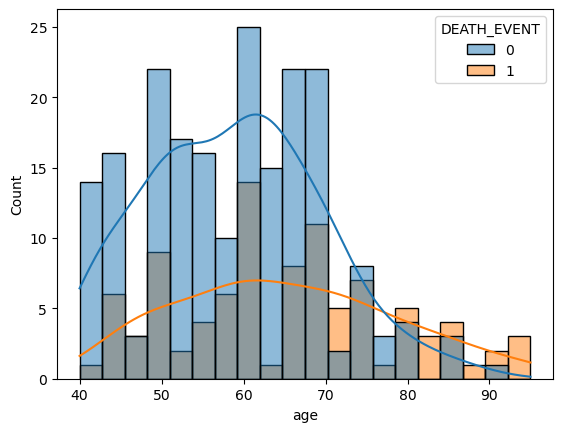

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data, x="age", hue="DEATH_EVENT", kde=True, bins=20)
plt.show()

I am plotting a histplot:  
To see if a particular age group is more prone to heart failure.


By observing the histplot we can say that:  
death because of heart failure is more likely in age between 70 to 90

**BOXPLOT**

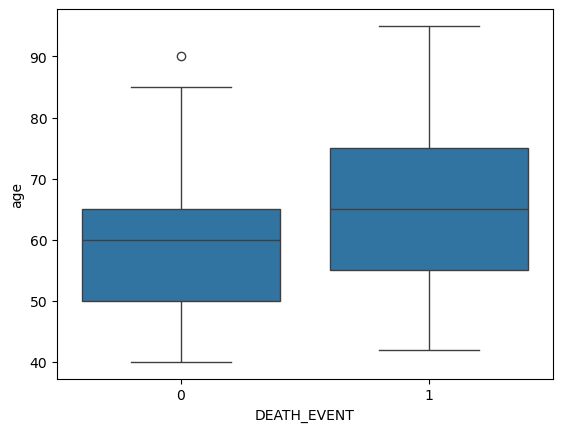

In [7]:
sns.boxplot(x="DEATH_EVENT", y="age", data=data)
plt.show()

Since, age 90 is detected as outlier but age is 90 is usual and people live till the age of 90   
so it should be treated as outlier

**COUNTPLOT**

In [ ]:
# To check whether smoking or high blood pressure increases the risk of death.

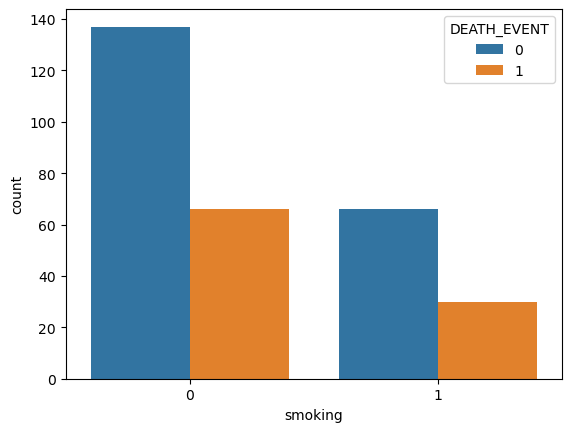

In [8]:
sns.countplot(x="smoking", hue="DEATH_EVENT", data=data)
plt.show()

# DATA PREPROCESSING

**CONVERTING CATEGORICAL DATA TO NUMERICAL DATA**

In [10]:
colname=[]
for x in data.columns:
    if data[x].dtype=='object':
        colname.append(x)
print(colname)



# appliying fit transform method to all the columns (transform_method) i.e categorical to numerical
# For preprocessing the data
from sklearn.preprocessing import LabelEncoder
 
le=LabelEncoder()
 
for x in colname:
    data[x]=le.fit_transform(data[x])
  

[]


**CREATING X AND Y**

In [11]:
X = data.loc[:,['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]
Y = data.loc[:,'DEATH_EVENT']


**SCALING THE DATA**

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()    

scaler.fit(X)                
scaler.transform(X)

array([[ 1.19294523e+00, -8.71104775e-01,  1.65728387e-04, ...,
         7.35688190e-01, -6.87681906e-01, -1.62950241e+00],
       [-4.91279276e-01, -8.71104775e-01,  7.51463953e+00, ...,
         7.35688190e-01, -6.87681906e-01, -1.60369074e+00],
       [ 3.50832977e-01, -8.71104775e-01, -4.49938761e-01, ...,
         7.35688190e-01,  1.45416070e+00, -1.59078490e+00],
       ...,
       [-1.33339153e+00, -8.71104775e-01,  1.52597865e+00, ...,
        -1.35927151e+00, -6.87681906e-01,  1.90669738e+00],
       [-1.33339153e+00, -8.71104775e-01,  1.89039811e+00, ...,
         7.35688190e-01,  1.45416070e+00,  1.93250906e+00],
       [-9.12335403e-01, -8.71104775e-01, -3.98321274e-01, ...,
         7.35688190e-01,  1.45416070e+00,  1.99703825e+00]])

**SPLITTING DATA INTO TRAIN AND TEST**

In [42]:
# splitting the data into test and train
from sklearn.model_selection import train_test_split

# split the data into test and train
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state = 10)  

In [43]:
print("Before OverSampling, counts of label '1': ", (sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(Y_train == 0)))
  
# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10,k_neighbors=5)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)
  
print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (Y_train_res.shape))
  
print("After OverSampling, counts of label '1': ", (sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(Y_train_res == 0)))

Before OverSampling, counts of label '1':  67
Before OverSampling, counts of label '0':  142
After OverSampling, the shape of train_X:  (284, 12)
After OverSampling, the shape of train_y:  (284,)
After OverSampling, counts of label '1':  142
After OverSampling, counts of label '0':  142


# MODEL BUILDING

**LOGISTIC REGRESSION**

In [44]:
from sklearn.linear_model import LogisticRegression
# create a model
classifier=LogisticRegression(random_state=10)

# fitting training data to the model...........(input is X and Y)
classifier.fit(X_train,Y_train)

# output is equation of liner regression 
print(classifier.intercept_)   # intercept is beta-not
print(classifier.coef_)     # coef is beta-1,beta-2

[0.0002187]
[[ 6.49383078e-02  6.48948296e-04  3.84037329e-05  5.07493326e-04
  -7.94645960e-02 -2.64904162e-04 -7.88846930e-07  8.56701289e-03
   3.77243809e-03 -2.47405353e-04 -2.88977848e-04 -1.95749642e-02]]


In [123]:
# zipping to see kon se variable ka kya value aaya h
print(list(zip(data.columns[0:-1],classifier.coef_.ravel())))

[('anaemia', 0.14014619743583628), ('diabetes', -0.480883474990492), ('high_blood_pressure', -0.2768624709040214), ('sex', -0.34083706226266114), ('smoking', -0.29595965856652223), ('DEATH_EVENT', 0.32526557401128203), ('age_Group_Encoded', 0.2101084751148429), ('creatinine_phosphokinase_Group_Encoded', 0.372279646018749), ('ejection_fraction_Group_Encoded', -0.13995173382128595), ('platelets_Group_Encoded', 0.08234657074516051), ('serum_creatinine_Group_Encoded', -0.6377785312989714), ('serum_sodium_Group_Encoded', -0.19675347371967608)]


In [45]:
# input me sirf x hi dalta h
Y_pred=classifier.predict(X_test)
print(Y_pred)

[1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1]


In [ ]:
# checking ki predicted is matching with test or no 
print(list(zip(Y_test,Y_pred)))

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
# confusion matrix
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))


# accuracy_score
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[53  8]
 [10 19]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        61
           1       0.70      0.66      0.68        29

    accuracy                           0.80        90
   macro avg       0.77      0.76      0.77        90
weighted avg       0.80      0.80      0.80        90

Accuracy of the model:  0.8


**TUNNING LOGISTIC REGRESSION**

In [61]:
y_pred_prob = classifier.predict_proba(X_test)
# print(y_pred_prob)


y_pred_class = []
for value in y_pred_prob[:,1]:
    if value >0.55:                         # agar value 0.5 se jayada h to consider as 1
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)              # agar value 0.5 se kum h to consider as 0


from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
# confusion matrix
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,y_pred_class))


# accuracy_score
acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)


[[54  7]
 [11 18]]
Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        61
           1       0.72      0.62      0.67        29

    accuracy                           0.80        90
   macro avg       0.78      0.75      0.76        90
weighted avg       0.80      0.80      0.80        90

Accuracy of the model:  0.8


**CHECKING FOR OPTIMUM THRESHOLD**

In [62]:
# baar baar kon check krne baithega kon sa threshhold lu isliye direct method  for that

for a in np.arange(0.4,0.61,0.01):   # range of 0.4 to 0.6 by difference of 0.01
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)     # in the matrix of  y+pred_prob .where function is similar to if else agar true aaya to 1 lo false aaya to 0 lo
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])



Errors at threshold  0.4 : 20  , type 2 error : 10  , type 1 error: 10
Errors at threshold  0.41000000000000003 : 20  , type 2 error : 10  , type 1 error: 10
Errors at threshold  0.42000000000000004 : 20  , type 2 error : 10  , type 1 error: 10
Errors at threshold  0.43000000000000005 : 20  , type 2 error : 10  , type 1 error: 10
Errors at threshold  0.44000000000000006 : 19  , type 2 error : 10  , type 1 error: 9
Errors at threshold  0.45000000000000007 : 19  , type 2 error : 10  , type 1 error: 9
Errors at threshold  0.4600000000000001 : 18  , type 2 error : 10  , type 1 error: 8
Errors at threshold  0.4700000000000001 : 18  , type 2 error : 10  , type 1 error: 8
Errors at threshold  0.4800000000000001 : 18  , type 2 error : 10  , type 1 error: 8
Errors at threshold  0.4900000000000001 : 18  , type 2 error : 10  , type 1 error: 8
Errors at threshold  0.5000000000000001 : 18  , type 2 error : 10  , type 1 error: 8
Errors at threshold  0.5100000000000001 : 18  , type 2 error : 10  , ty

**CHECKING GOODNESS OF MODEL**

0.8501978518937252


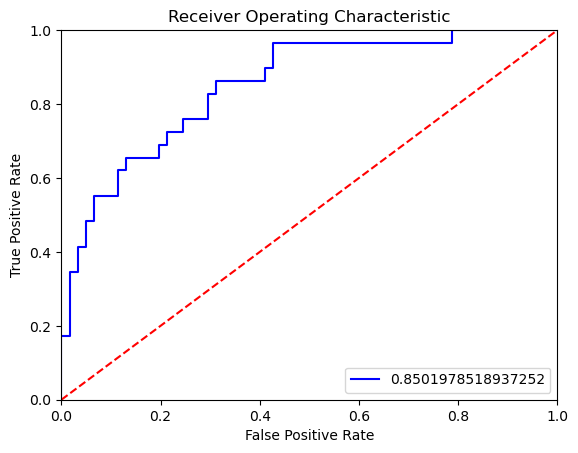

In [63]:
from sklearn import metrics
 
fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_prob[:,1])    
auc = metrics.auc(fpr,tpr)     # fpr = false positive rate ,# tpr = true positive rate
 
print(auc)
# auc = are under curve, jiska area jayada h vo aacha h
# if auc = 0.5 (worst model)
# if auc = 0.5 to 0.6 ( poor model)
# if auc = 0.6 to 0.7 (bad model)
# if auc = 0.7 to 0.8 (good model)
# if auc = 0.8 to 0.9 (very.good model)
# if auc = 0.9 to 1.0 (excellent model)
# so, our model is very good model


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)   
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.plot(fpr_new,tpr_new, 'green')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
 
plt.show()

**DECISION TREE**

In [64]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DT=DecisionTreeClassifier(random_state=10, 
                                         criterion="gini")
#min_samples_leaf, min_samples_split, max_depth, max_features, max_leaf_nodes

#fit the model on the data and predict the values
model_DT.fit(X_train_res,Y_train_res)
Y_pred=model_DT.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

model_DT.score(X_train,Y_train)

[[54  7]
 [11 18]]
0.8
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        61
           1       0.72      0.62      0.67        29

    accuracy                           0.80        90
   macro avg       0.78      0.75      0.76        90
weighted avg       0.80      0.80      0.80        90



1.0

In [76]:
from sklearn.tree import DecisionTreeClassifier

model_DT=DecisionTreeClassifier(random_state=10, 
                                         criterion="gini",
                                         splitter="best", 
                                         min_samples_leaf=3,
                                         min_samples_split=5,
                                         max_depth=10, 
                                        #max_leaf_nodes=100,
                                         # max_features=0.6
                                         )
#min_samples_leaf, min_samples_split, max_depth, max_features, max_leaf_nodes

#fit the model on the data and predict the values
model_DT.fit(X_train,Y_train)

test_pred=model_DT.predict(X_test)
test_pred



from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[51 10]
 [12 17]]
0.7555555555555555
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        61
           1       0.63      0.59      0.61        29

    accuracy                           0.76        90
   macro avg       0.72      0.71      0.71        90
weighted avg       0.75      0.76      0.75        90



**SVM**

In [20]:
from sklearn import svm
model_SVC=svm.SVC(kernel="rbf", gamma=0.1, C=1)
#fitting training data to the model
model_SVC.fit(X_train_res,Y_train_res)

Y_pred=model_SVC.predict(X_test)
#print(list(zip(Y_test,Y_pred)))


from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[61  0]
 [29  0]]
0.6777777777777778
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        61
           1       0.00      0.00      0.00        29

    accuracy                           0.68        90
   macro avg       0.34      0.50      0.40        90
weighted avg       0.46      0.68      0.55        90



**KNN**

In [21]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=33, 
                               metric='euclidean')
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

In [22]:
int(np.sqrt(len(X_train)))

14

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[61  0]
 [29  0]]
0.6777777777777778
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        61
           1       0.00      0.00      0.00        29

    accuracy                           0.68        90
   macro avg       0.34      0.50      0.40        90
weighted avg       0.46      0.68      0.55        90



**XG BOOST**

In [25]:
from xgboost import XGBClassifier

model_GradientBoosting=XGBClassifier(n_estimators=100,random_state=10)

#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)

Y_pred=model_GradientBoosting.predict(X_test)


from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))

[[57  4]
 [ 6 23]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        61
           1       0.85      0.79      0.82        29

    accuracy                           0.89        90
   macro avg       0.88      0.86      0.87        90
weighted avg       0.89      0.89      0.89        90

0.8888888888888888


# COMBINING MULTIPLE MODELS

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# first, initialize the classificators
tree= DecisionTreeClassifier(random_state=10) # using the random state for reproducibility
knn= KNeighborsClassifier(n_neighbors=5,metric='euclidean')
svm= SVC(kernel="rbf", gamma=0.1, C=90,random_state=10)
logreg=LogisticRegression(multi_class="multinomial",random_state=10)

In [105]:
# now, create a list with the objects 
models= [tree, knn, svm, logreg]

In [106]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

for model in models:
    model.fit(X_train_res, Y_train_res) # fit the model
    Y_pred= model.predict(X_test) # then predict on the test set
    accuracy= accuracy_score(Y_test, Y_pred) 
    clf_report= classification_report(Y_test, Y_pred) 
    print(confusion_matrix(Y_test,Y_pred))
    print("The accuracy of the ",type(model).__name__, " model is ", accuracy*100 )
    print("Classification report:\n", clf_report)
    print("\n")

[[51 10]
 [10 19]]
The accuracy of the  DecisionTreeClassifier  model is  77.77777777777779
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        61
           1       0.66      0.66      0.66        29

    accuracy                           0.78        90
   macro avg       0.75      0.75      0.75        90
weighted avg       0.78      0.78      0.78        90



[[45 16]
 [14 15]]
The accuracy of the  KNeighborsClassifier  model is  66.66666666666666
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75        61
           1       0.48      0.52      0.50        29

    accuracy                           0.67        90
   macro avg       0.62      0.63      0.62        90
weighted avg       0.67      0.67      0.67        90



[[47 14]
 [15 14]]
The accuracy of the  SVC  model is  67.77777777777779
Classification report:
               p

# CONCLUSION

--> Here my class of importance is class 0 :  

--> so, boosted decision tree gives the highest accuracy on this dataset

--> It give 92% accuracy on class 0 and 85% accuracy on class 1.  
--> Over all accuracy of model is 88.88%  

--> Which is highest amongs all the other models.  


Grouping Data Points:

Here i am trying to group all the numerical variables such that it concise into few categories.  
Lets see by grouping the data points will increase accurcay or not?

# IMPORTING LIBRARY

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# READ DATA SET

In [107]:
data = pd.read_table(r"C:\Users\Pragya\Downloads\heart+failure+clinical+records\heart_failure_clinical_records_dataset.csv",delimiter=",")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# GROUPING DATA SET

In [108]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Define bins and labels for each numerical variable
grouping_rules = {
    "age": ([0, 40, 60, 80, 100], ["0-40", "41-60", "61-80", "81-100"]),
    "creatinine_phosphokinase": ([0, 200, 1000, 5000, 8000], ["Low", "Moderate", "High", "Very High"]),
    "ejection_fraction": ([10, 30, 40, 50, 80], ["Low", "Below Normal", "Normal", "High"]),
    "platelets": ([0, 150000, 250000, 350000, 500000], ["Low", "Normal", "Slightly High", "High"]),
    "serum_creatinine": ([0, 1, 2, 5], ["Normal", "High", "Very High"]),
    "serum_sodium": ([100, 130, 135, 145, 160], ["Low", "Slightly Low", "Normal", "High"]),
    "time": ([0, 50, 100, 150, 300], ["Short", "Medium", "Long", "Very Long"]),
}

# Apply grouping to each variable
for var, (bins, labels) in grouping_rules.items():
    data[f"{var}_Group"] = pd.cut(data[var], bins=bins, labels=labels)

# Apply Label Encoding to all newly created groups
encoder = LabelEncoder()
for var in grouping_rules.keys():
    data[f"{var}_Group_Encoded"] = encoder.fit_transform(data[f"{var}_Group"])

# Display first few rows with grouped variables
data.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,...,serum_creatinine_Group,serum_sodium_Group,time_Group,age_Group_Encoded,creatinine_phosphokinase_Group_Encoded,ejection_fraction_Group_Encoded,platelets_Group_Encoded,serum_creatinine_Group_Encoded,serum_sodium_Group_Encoded,time_Group_Encoded
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,...,High,Low,Short,2,2,2,3,0,1,2
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,...,High,Normal,Short,1,3,0,3,0,2,2
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,...,High,Low,Short,2,1,2,2,0,1,2
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,...,High,Normal,Short,1,1,2,2,0,2,2
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,...,Very High,Low,Short,2,1,2,3,2,1,2


# DROPING VARIABLES

In [109]:
data.drop(['age', 'creatinine_phosphokinase',
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time',
       'age_Group', 'creatinine_phosphokinase_Group',
       'ejection_fraction_Group', 'platelets_Group', 'serum_creatinine_Group',
       'serum_sodium_Group', 'time_Group'],axis=1,inplace=True)

I AM DROPPING VARIABLES BECAUSE IT CREATE NEW GROUPED VARIABLE  
SO THAT I AM DROPPING THE ORIGINAL VARIABLE BECAUSE ONCE I GET THE GROUPED NO NEED TO KEEP THE ORIGINAL ONE.  
THATS WHY I AM DROPPING IT.

# CROSS CHECKING THE SHAPE OF VARIABLE

In [92]:
data.shape

(299, 13)

In [93]:
data.columns

Index(['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking',
       'DEATH_EVENT', 'age_Group_Encoded',
       'creatinine_phosphokinase_Group_Encoded',
       'ejection_fraction_Group_Encoded', 'platelets_Group_Encoded',
       'serum_creatinine_Group_Encoded', 'serum_sodium_Group_Encoded',
       'time_Group_Encoded'],
      dtype='object')

# CREATING X AND Y

In [110]:
X = data.loc[:,['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking',
        'age_Group_Encoded',
       'creatinine_phosphokinase_Group_Encoded',
       'ejection_fraction_Group_Encoded', 'platelets_Group_Encoded',
       'serum_creatinine_Group_Encoded', 'serum_sodium_Group_Encoded',
       'time_Group_Encoded']]
Y = data.loc[:,'DEATH_EVENT']


# SCALING

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()    

scaler.fit(X)                
scaler.transform(X)

array([[-0.87110478, -0.84757938,  1.35927151, ..., -0.95435529,
        -2.04151923,  0.18639336],
       [-0.87110478, -0.84757938, -0.73568819, ..., -0.95435529,
        -0.29747852,  0.18639336],
       [-0.87110478, -0.84757938, -0.73568819, ..., -0.95435529,
        -2.04151923,  0.18639336],
       ...,
       [-0.87110478,  1.1798305 , -0.73568819, ...,  0.44443016,
        -0.29747852,  1.05719984],
       [-0.87110478, -0.84757938, -0.73568819, ..., -0.95435529,
        -0.29747852,  1.05719984],
       [-0.87110478, -0.84757938, -0.73568819, ..., -0.95435529,
        -0.29747852,  1.05719984]])

# SPLITTING DATA INTO TRAIN AND TEST

In [112]:
# splitting the data into test and train
from sklearn.model_selection import train_test_split

# split the data into test and train
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state = 10)  

# DISTRIBUTION OF TARGET VARIABLE

In [117]:
data['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

My dataset is imbalance   
So i need to make it balance.

# SMOTE

for balancing the targete variable i am using smote technique.  
Such that both the categories have equal no of data points.  
Such that my model will learnt upon both the category properly.

In [113]:
print("Before OverSampling, counts of label '1': ", (sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(Y_train == 0)))
  
# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10,k_neighbors=5)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)
  
print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (Y_train_res.shape))
  
print("After OverSampling, counts of label '1': ", (sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(Y_train_res == 0)))

Before OverSampling, counts of label '1':  67
Before OverSampling, counts of label '0':  142
After OverSampling, the shape of train_X:  (284, 12)
After OverSampling, the shape of train_y:  (284,)
After OverSampling, counts of label '1':  142
After OverSampling, counts of label '0':  142


**CLASS DISTRIBUTION**

After grouping all the variables i got the final categories in my all variables

In [114]:
for i in data.columns:
    print({i:data[i].unique()})

{'anaemia': array([0, 1], dtype=int64)}
{'diabetes': array([0, 1], dtype=int64)}
{'high_blood_pressure': array([1, 0], dtype=int64)}
{'sex': array([1, 0], dtype=int64)}
{'smoking': array([0, 1], dtype=int64)}
{'DEATH_EVENT': array([1, 0], dtype=int64)}
{'age_Group_Encoded': array([2, 1, 3, 0])}
{'creatinine_phosphokinase_Group_Encoded': array([2, 3, 1, 0])}
{'ejection_fraction_Group_Encoded': array([2, 0, 1, 3])}
{'platelets_Group_Encoded': array([3, 2, 1, 0, 4])}
{'serum_creatinine_Group_Encoded': array([0, 2, 3, 1])}
{'serum_sodium_Group_Encoded': array([1, 2, 3, 0])}
{'time_Group_Encoded': array([2, 1, 0, 3])}


# MODEL BUILDING

In [115]:
from sklearn.linear_model import LogisticRegression
# create a model
classifier=LogisticRegression(random_state=10)

# fitting training data to the model...........(input is X and Y)
classifier.fit(X_train_res,Y_train_res)

# output is equation of liner regression 
print(classifier.intercept_)   # intercept is beta-not
print(classifier.coef_)     # coef is beta-1,beta-2

# input me sirf x hi dalta h
Y_pred=classifier.predict(X_test)
print(Y_pred)


from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
# confusion matrix
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))


# accuracy_score
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[1.1273135]
[[ 0.1401462  -0.48088347 -0.27686247 -0.34083706 -0.29595966  0.32526557
   0.21010848  0.37227965 -0.13995173  0.08234657 -0.63777853 -0.19675347]]
[0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0
 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1]
[[45 16]
 [17 12]]
Classification report: 
              precision    recall  f1-score   support

           0       0.73      0.74      0.73        61
           1       0.43      0.41      0.42        29

    accuracy                           0.63        90
   macro avg       0.58      0.58      0.58        90
weighted avg       0.63      0.63      0.63        90

Accuracy of the model:  0.6333333333333333


In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# first, initialize the classificators
tree= DecisionTreeClassifier(random_state=10) # using the random state for reproducibility
knn= KNeighborsClassifier(n_neighbors=5,metric='euclidean')
svm= SVC(kernel="rbf", gamma=0.1, C=90,random_state=10)
logreg=LogisticRegression(multi_class="multinomial",random_state=10)

In [119]:
# now, create a list with the objects 
models= [tree, knn, svm, logreg]

In [121]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

for model in models:
    model.fit(X_train_res, Y_train_res) # fit the model
    Y_pred= model.predict(X_test) # then predict on the test set
    accuracy= accuracy_score(Y_test, Y_pred) 
    clf_report= classification_report(Y_test, Y_pred) 
    print(confusion_matrix(Y_test,Y_pred))
    print("The accuracy of the ",type(model).__name__, " model is ", accuracy*100 )
    print("Classification report:\n", clf_report)
    print("\n")

[[51 10]
 [10 19]]
The accuracy of the  DecisionTreeClassifier  model is  77.77777777777779
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        61
           1       0.66      0.66      0.66        29

    accuracy                           0.78        90
   macro avg       0.75      0.75      0.75        90
weighted avg       0.78      0.78      0.78        90



[[45 16]
 [14 15]]
The accuracy of the  KNeighborsClassifier  model is  66.66666666666666
Classification report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75        61
           1       0.48      0.52      0.50        29

    accuracy                           0.67        90
   macro avg       0.62      0.63      0.62        90
weighted avg       0.67      0.67      0.67        90



[[47 14]
 [15 14]]
The accuracy of the  SVC  model is  67.77777777777779
Classification report:
               p

# CONCLUSION

Here i can conclude that by grouping the data point by models accuracy is not increasing.  
And by grouping the data i ma manupulating the data very badly because we know that  
some small noint increase in parametes can laeds to death of an individual.

The model that i have made above in the code file without manupulating the data set   
is the best model for heart disease pridiction which is "BOOSTED DECISION TREE".